In [1]:
import math as m
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mastercard(x,y):
    circ_der = (x-0.7)**2 + y**2
    circ_izq = (x+0.7)**2 + y**2
    if circ_der <= 1 or circ_izq <=1:
        respuesta = True
    else:
        respuesta = False
    return respuesta

def elipse(x,y):
    la_elise = x**2/6.0 + y**2/4.0
    if la_elise >= 1:
        respuesta = True
    else: 
        respuesta = False
    return respuesta
    
def Malla_electrodos(x,y,elec_in,elec_out):
    Nx , Ny = len(x) , len(y)
    malla = np.zeros((Nx,Ny))
    for i in range(Nx):
        for j in range(Ny):
            if  elec_in(x[i],y[j]):
                malla[i,j] = 1
            elif elec_out(x[i],y[j]):
                malla[i,j] = 0
            else:
                malla[i,j] = rd.random()
    return malla

def chk_ind(x,y,V):
    pts = []
    for i in range(len(x)):
        for j in range(len(y)):
            if 0 < V[i,j] < 1:
                pts.append([i,j])
    return pts

def Relajar_v2(V,inds):
    for ind in inds:
        V[ind[0],ind[1]] = 0.25*( V[ind[0]+1,ind[1]] + V[ind[0]-1,ind[1]] + V[ind[0],ind[1]+1] + V[ind[0],ind[1]-1] )
    return V

def Met_Jocobi_v2(V,inds,err=1e-4):
    diferencia = 1
    while diferencia > err:
        for i in range(20):
            V = Relajar_v2(V,inds)
        V_ref = Relajar_v2(np.copy(V),inds)
        diferencia = np.max(abs(V_ref-V))
    return V

In [19]:
x , y = np.linspace(-2.5,2.5,200) , np.linspace(-2,2,200)
pot = Malla_electrodos(x,y,mastercard,elipse)
indices_mc = chk_ind(x,y,pot)
pot = Met_Jocobi_v2(pot,indices_mc)

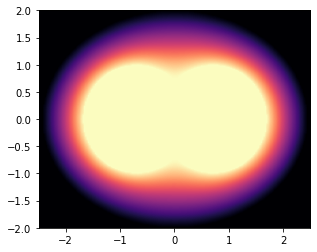

In [20]:
plt.imshow(pot.transpose(),
           extent=(x[0],x[-1],y[0],y[-1]),
           origin='lower',
           cmap='magma')
plt.show()

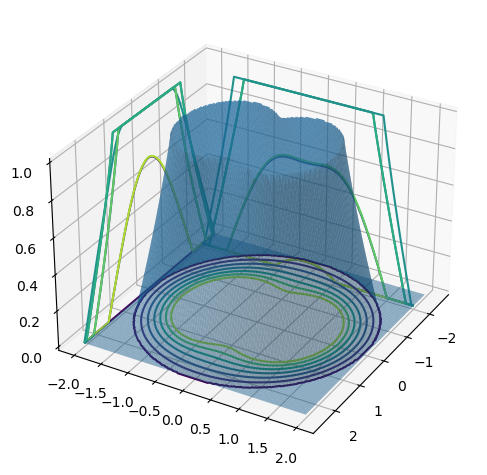

In [49]:
XX , YY = np.meshgrid(x,y)

figura = plt.figure(figsize=(8,6), dpi=100)
ejes = figura.add_subplot(111,projection='3d')
ejes.plot_surface(XX,YY,pot,alpha=0.5,rstride=2,cstride=2)
ejes.contour(XX,YY,pot,zdir="x",offset=-2)
ejes.contour(XX,YY,pot,zdir="y",offset=-2)
ejes.contour(XX,YY,pot,zdir="z",offset=0)
ejes.view_init(30,30)
plt.show()